In [1]:
from iertools.tb import *
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [2]:
# pip install git+https://github.com/AltamarMx/iertools.git

**EN LA PARTE DE ABAJO (fecha1) TIENE QUE SER UNA FECHA EN LA QUE HAYA DATOS, POR QUE SI NO MARCARÁ UN ERROR**

In [3]:
fecha1 = parse("2024-09-25")   #Año, mes , dia
fecha2 = fecha1 + pd.Timedelta("1D")

tmp= TB(config_file='config_esp.ini',device_name='est_Tlaltenango')
sensores = ["Temperatura","Humedad","Presion"]

# cafe es un nombre temporal, 
cafe = pd.concat([tmp.get_df(key=sensor,start_datetime=fecha1,end_datetime=fecha2).resample('1min').mean() for sensor in sensores],axis=1)


["Temperatura","Humedad","Presion"]


C:\Users\roele\AppData\Local\Programs\Python\Python312\Lib\site-packages\iertools\tb.py:120: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  datos = pd.read_json(telemetry.text, orient=None)
C:\Users\roele\AppData\Local\Programs\Python\Python312\Lib\site-packages\iertools\tb.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignmen

In [4]:
# cafe.plot()
cafe

,Temperatura,Humedad,Presion
ts,,,
2024-09-24 22:00:00,23.522060,73.512340,776.79355
2024-09-24 22:01:00,24.573080,65.852325,876.04040
2024-09-24 22:02:00,24.399280,66.126345,876.03925
2024-09-24 22:03:00,23.331165,73.983265,776.78230
2024-09-24 22:04:00,NaN,NaN,NaN
...,...,...,...
2024-09-25 11:14:00,NaN,NaN,NaN
2024-09-25 11:15:00,NaN,NaN,NaN
2024-09-25 11:16:00,NaN,NaN,NaN


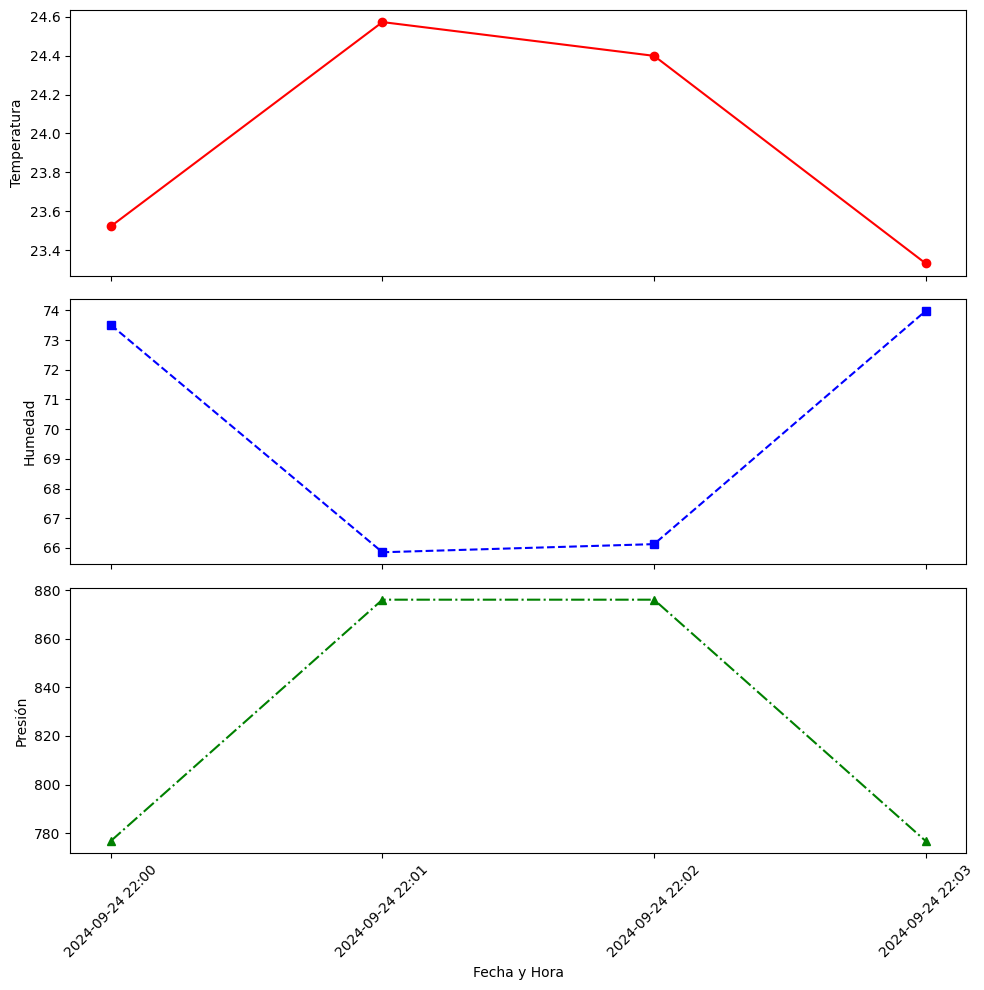

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el rango de fechas
start_time = '2024-09-24 22:00:00'
end_time = '2024-09-24 22:04:00'
filtered_data = cafe.loc[start_time:end_time]

# Crear las subplots (3 filas, 1 columna)
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Graficar Temperatura
axs[0].plot(filtered_data.index, filtered_data['Temperatura'], color='red', linestyle='-', marker='o')
# axs[0].set_title('Temperatura (°C)')
axs[0].set_ylabel('Temperatura')

# Graficar Humedad
axs[1].plot(filtered_data.index, filtered_data['Humedad'], color='blue', linestyle='--', marker='s')
# axs[1].set_title('Humedad (%)')
axs[1].set_ylabel('Humedad')

# Graficar Presion
axs[2].plot(filtered_data.index, filtered_data['Presion'], color='green', linestyle='-.', marker='^')
# axs[2].set_title('Presión (hPa)')
axs[2].set_ylabel('Presión')

# Configurar etiquetas comunes
axs[2].set_xlabel('Fecha y Hora')

# Formatear el eje X para mostrar cada minuto
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))  # Salto de 1 minuto
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Formato de la fecha

# Rotar las etiquetas del eje X para todas las subplots
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
